In [1]:
# 원본 데이터셋 출처
# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data
# 2013년 9월 유럽 카드 소지자가 신용카드로 거래한 내용, 284807건의 거래 가운데 492건의 사기거래
# 변수 v1~v28, Amount 거래 금액, Class 0/1 정상거래/사기거래
import pandas as pd
# 신용카드 거래 데이터 csv 파일을 로딩(원본)
df = pd.read_csv("c:/data/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

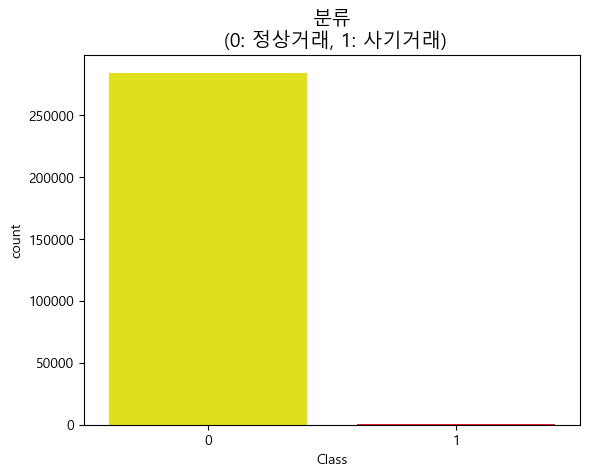

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0: 정상거래, 1: 사기거래)', fontsize=14)
#불균형 데이터셋

In [3]:
print("사기거래")
print(df.Amount[df.Class == 1].describe())
print()
print("정상거래")
print(df.Amount[df.Class == 0].describe())
# 사기거래 492건, 정상거래 284315건

사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [4]:
train_cols = df.columns[1:30]
print(train_cols)
X = df[train_cols] # 독립변수
y = df["Class"]
print(df[train_cols].head())
print(y.head())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [6]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    #모델 초기화
    model = Sequential(name='model1')
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number,)))
    model.add(Dense(hidden_layers[1], activation="relu"))
    model.add(Dense(hidden_layers[2], activation="relu"))
    #드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    #지정한 비율만큼 랜덤으로 출력을 off 시켜서 과적합을 방지하기 위한 기법(앙상블 학습의 효과도 얻을 수 있음)
    model.add(Dropout(0.2, name='Dropout'))
    #출력층
    model.add(Dense(output_number, activation="sigmoid", name='Output'))
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model

In [9]:
model = make_model(len(X_train.columns), [128,64,32], 1)

In [10]:
X_train_scaled=X_train
X_test_scaled=X_test

In [11]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 5ms/step - loss: 0.2023 - accuracy: 0.7840
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1275 - accuracy: 0.8615
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.8742
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0962 - accuracy: 0.8958
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9098
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.9212
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9390
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0707 - accuracy: 0.9199
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0693 - accuracy: 0.9276
Epoch 10/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0893 - accuracy: 0.9060


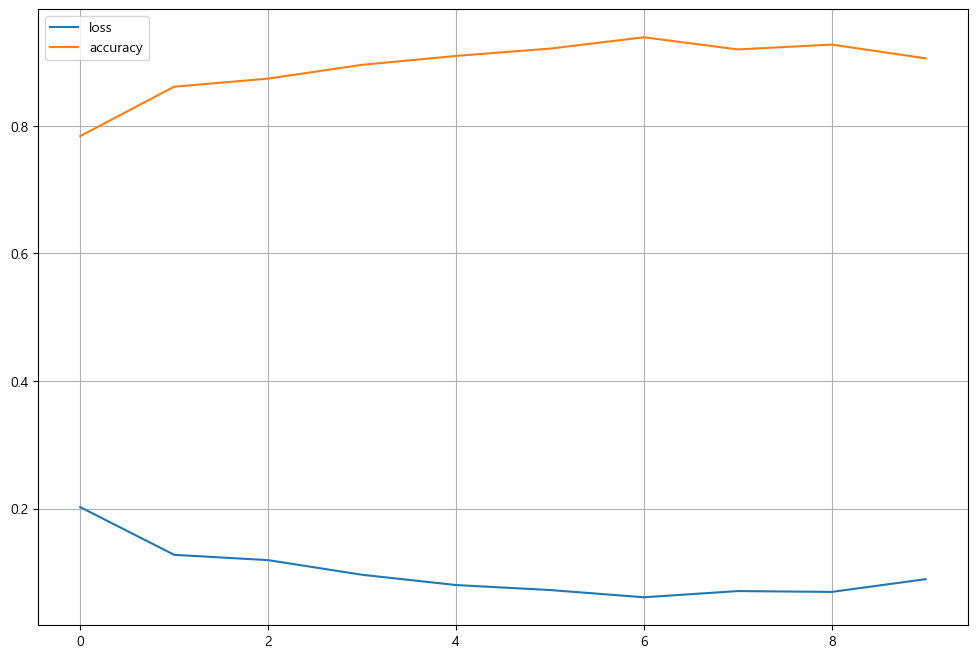

In [12]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [13]:
# 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

25/25 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.9085
[0.09310209006071091, 0.9085133671760559]
accuracy: 90.85%


In [14]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

7/7 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.8579
[0.1271035224199295, 0.8578680157661438]
accuracy: 85.79%


In [15]:
pred=model.predict(X_test)
print(pred[:5].argmax(axis=1))

7/7 [==============================] - 0s 2ms/step
[0 0 0 0 0]
